# Summary of Findings

### Introduction
The NYPD dataset is a collection of complaints against NYPD officers spanning all the way from 1985 to 2020. Each row is a complaint filed against a specific officer with columns pertaining to date received, date closed, the reason of the complaint, demographic info about the person filing the complaint, and the outcome of the case from the Civilian Complaint Review Board. There can be three outcomes to a case: substantiated, unsubstantiated, exonorated. Substantiated indicates that the officer was found guilty of the allegation and went against NYPD rules. Unsubstantiated indicates that the officer was not found guilty of the allegations and did not break the rules. Exonorated is when the officer has done the alleged act, but it did not break the rules. The data is grouped by officers and only contains officers with at least one allegation towards them.

The dataset is home to many interesting questions, one of which is whether or not white-officer vs non-white complainants go against the complainant. Especially in this day and age, analyzing such data relating to race could give some insight into some possible systematic racial bias within the American law enforcement.

### Cleaning and EDA
#### Cleaning
To clean the dataset I first substituted values within the complainant_ethnicity column with that should be NaN (eg. 'Unknown' and 'Refused'). This was to help make the dataset a little more accurate. While also exploring the datatypes of the columns, I noticed that categorical columns like precinct or unique_mos_id floats and ints. While not inherently wrong, casting each of the columns to string will help them be more consistent with the categorical datatype. The data also had separate column for month and year of when the cases were received and closed, so to make them easier to work with, the month and year columns were combined into a single date column of type datetime. Looking at the unique values of the board_dispositions columns, we can see that there are values of unsubstantiated, exonerated, and then there are sub-cateories of the substnatiated column. In our case, the specific outcomes of the substantiated cases aren't really relevant, so the column was cleaned up so that all the rows containing substantiated and then the specific outcome just showed the word substantitaed. Then in relation to the question: "Are white-officer vs non-white complaintant cases more likely to go against the complainant?", another column was added analyzing which of the cases were with a white-officer and non-white complainant. In addition, another column indicating if the outcome went against the complainant. If the outcome of the cases was unsubstantiated or exonerated, then the value for against_complainant would be true. Exonerated is considered to go against he complainant because even though the officer was found doing the alleged act, nothing really happens to the officer. However if the outcome of the case was substantiated, it is considered to go in favor of the complainant, so the corresponding value in against_complainant would be false. A smaller dataframe with relevant columns to the posed question was also pullled out for easier readability since there is a lot of data in the original dataframe.
#### EDA
In exploring the data, an analysis on the summary statistics of the mos_age_incident and complainant_age_incident was carried out. It can be seen that the two distributions are centered around the same mean, however for complainant ages, there is a greater standard deviation. This could be due to the fact that to become a police officer, you have to be a certain age and in addition, if you are a younger recruit, you may have to do more drive arounds and interact with civilians more often and therefore a greater chance of getting a complaint. A sum of the number of null_values in each column was also looked at to try and understand possible mechanisms of missingness. It seems as though a large majority of missing values come from values associated with the complainant. An analysis of the distribution of ethnicities of the mos complainants was also visualized through the corresponding tables and bar graphs. It can be seen that a large majority of officers with a complaint against them are white and also a large majority of complainants were black. A pivot table was created using the information from the newly created columns "white_mos_nonwhite_complainant" and "against_complainant" in relation to the question. In the table it shows that given that the case involved (did not involve) a white mos and nonwhite complainant, did the case go for or against the complainant. By looking at the corresponding bar graph, it seems that the bars are pretty similar, but it is a little hard to determine if they are similar enough. This is a perfect instance for a permutation test which will be addressed in the dedicated section. 

### Assessment of Missingness
When assessing the missingness within the NYPD dataframe, the complainant_ethnicity column served as a good choice as it related to the question at hand. Using domain knowledge, it can be deducted that the missingness within the column most likely has something to do with the actual values within the column. If we look at the uncleaned dataset, we can see that in the column, ther are instances of the value "Refused" in which the complainant refused to list their ethnicity. This makes sense because some people don't quite feel comfortable sharing their ethnicity, therefore indicating that the column is NMAR. However, by collecting data asking if they a person of color, could make the complainant_ethnicity column MAR.
To check dependence between complainant_ethnicity and mos_ethnicity, a permutation test was run using the TVD as a test_statistic with a significance level of 0.05. The observed tvd was 0.07, however after running the permutation test, we get a p-value of 0.0. This allows us to reject the null hypothesis and indicates that between the two columns, complainant_ethnicit is MAR dependent. However, after running permutation tests, between complainant_ethnicity and other columns, a p-value of 0.0 kept on coming up consistently. This could be due to the fact that are large portion of the data is null (~50%). That being said, to find a non-dependent relationship between two columns, I ran a permutation test between contact reason and board_disposition to see if the missingness within contact_reason could be dependent on board_disposition. Again using the TVD as a test statistic and a significance value of 0.05, it can be seen that from our permutation test, a p-value of 0.534 was gotten back. This means that we fail to reject our null hypothesis that the two distributions of board_dispostion (null/nonnull) come from the same distribution and that the two columns are MCAR.

### Hypothesis Test
To address the question: "Are white-officer vs non-white complainant cases more likely to go against the complainant?", a permutation test was conducted. Since there was no population parameter to pull from, we used the values we had and conducted a permutation test. The null hypothesis stated that the probability of white-officer vs non-white complainant cases going against the complainant is equal to the probability of the cases that are not white-officer vs non-white complainant cases. The alternative hypothesis stated that white-officer vs non-white complainant cases were more likely to go against the complainant. These two hypotheses aregood for answer the question because we can test the under the null hypothesis that they come from the same distribution and see the probablity of seeing our observed test statistic. Since we are dealing with groups of data, the TVD was the obvious test statistic and a significance level of 0.05 was also set. To obtain the observed tvd, I made a pivot table indexed by the white_mos_nonwhite_complainant and columns against_complainant and taking the sum of the absolute difference divided by 2. Then over 500 iterations, the white_mos_nonwhite_complainant column was shuffled and then a tvd was taken from the shuffled pivot_table and recorded. Comparing the distribution of tvds to the observed tvd, we get a p-value of 0.0. This tells us that we reject the null hypothesis. This outcome was quite surprising because just looking at the pivot table values, they look pretty similar between the groups so I was expecting a higher p-value. However, our outcome is good for addressing the question at hand because assuming that white-oficer vs non-white complainint cases come from the same disribution cases that don't, we can see that the probability of seeing a tvd greater the one we saw in the original data is really low. 

# Code

In [607]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [608]:
# load in data
complaints = pd.read_csv('CCRB-Complaint-Data_202007271729/allegations_202007271729.csv')

In [609]:
# fill unknown and refused values w NaN
complaints['complainant_ethnicity'] = complaints['complainant_ethnicity'].replace(['Unknown', 'Refused'], np.nan)

In [610]:
# change datatypes of categorical data to string
data_types = {'unique_mos_id': 'str', 'shield_no': 'str', 'complaint_id': 'str', 'precinct': 'str'}
complaints = complaints.astype(data_types)

In [611]:
# combine month and year into one datetime column
combined_received = complaints['month_received'].astype('str') + '-' + complaints['year_received'].astype('str')
# convert to datetime and have it only show year-month
combined_received = pd.to_datetime(combined_received).dt.to_period('m')

combined_closed = complaints['month_closed'].astype('str') + '-' + complaints['year_closed'].astype('str')
combined_closed = pd.to_datetime(combined_closed).dt.to_period('m')

complaints = complaints.assign(**{'month_received': combined_received, 'month_closed': combined_closed})\
.rename(columns = {'month_received': 'date_received', 'month_closed': 'date_closed'})

complaints = complaints.drop(['year_received', 'year_closed'], axis = 1)

In [612]:
# add a col to see which are white officer + nonwhite complainant
complaints['white_mos_nonwhite_complainant'] = (complaints['mos_ethnicity'] == 'White') \
& (complaints['complainant_ethnicity'] != 'White') 

In [613]:
# clean outcome col to just keep the three categ
complaints['board_disposition'] = complaints['board_disposition']\
.apply(lambda x: 'Substantiated' if 'Substantiated' in x else x)

In [614]:
complaints['against_complainant'] = complaints['board_disposition']\
.apply(lambda x: False if 'Substantiated' == x else True)

In [615]:
complaints['complainant_age_incident'] = complaints['complainant_age_incident']\
.apply(lambda x: np.nan if x < 0 else x)

In [616]:
# Extract relevant columns into a smaller dataframe with columns relevant question
complaints_small = complaints[['unique_mos_id', 'mos_ethnicity', 'complainant_ethnicity', \
                                 'board_disposition', 'white_mos_nonwhite_complainant', 'against_complainant']]

<b>Summaries of the mos_age_incident and complainant_age_incident columns</b>

In [617]:
complaints['mos_age_incident'].describe().to_frame()

,mos_age_incident
count,33358.000000
mean,32.346873
std,6.040944
min,20.000000
25%,28.000000
50%,31.000000
75%,36.000000
max,60.000000


<AxesSubplot:title={'center':'Distribution of MOS ages'}, ylabel='Frequency'>

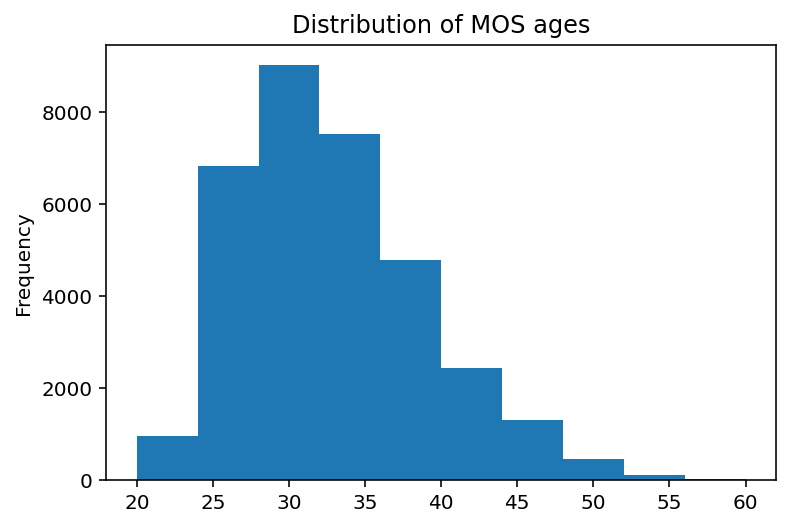

In [618]:
complaints['mos_age_incident'].plot(kind = 'hist', title = 'Distribution of MOS ages')

In [619]:
complaints['complainant_age_incident'].describe().to_frame()

,complainant_age_incident
count,28540.000000
mean,32.641906
std,12.206667
min,0.000000
25%,23.000000
50%,30.000000
75%,41.000000
max,101.000000


<AxesSubplot:title={'center':'Distribution of Complainant ages'}, ylabel='Frequency'>

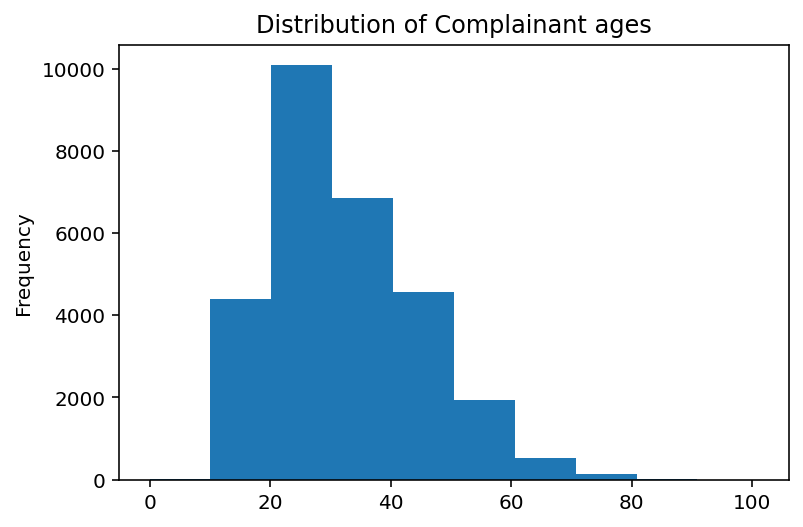

In [620]:
complaints['complainant_age_incident'].plot(kind = 'hist', title = 'Distribution of Complainant ages')

<b>Here we are checking the number of null values within each column. We can see that the columns with the most null values relate the information about the complainant</b>

In [621]:
complaints.isnull().sum()

unique_mos_id                        0
first_name                           0
last_name                            0
command_now                          0
shield_no                            0
complaint_id                         0
date_received                        0
date_closed                          0
command_at_incident               1544
rank_abbrev_incident                 0
rank_abbrev_now                      0
rank_now                             0
rank_incident                        0
mos_ethnicity                        0
mos_gender                           0
mos_age_incident                     0
complainant_ethnicity             5764
complainant_gender                4195
complainant_age_incident          4818
fado_type                            0
allegation                           1
precinct                             0
contact_reason                     199
outcome_description                 56
board_disposition                    0
white_mos_nonwhite_compla

Here we are getting the distribution of the 'mos_ethnicity' column to try and understand the ethnic distribution of officers through a normalized table of counts and a bar graph. This helps us understand how much of the data is made up of white officers.

Note: Even though each row is an individual case, some cases are against the same officer

In [622]:
complaints_small['mos_ethnicity'].value_counts(normalize = True)

White              0.541819
Hispanic           0.274297
Black              0.147611
Asian              0.035314
American Indian    0.000959
Name: mos_ethnicity, dtype: float64

<AxesSubplot:title={'center':'Ethnic Proportions of Officers'}>

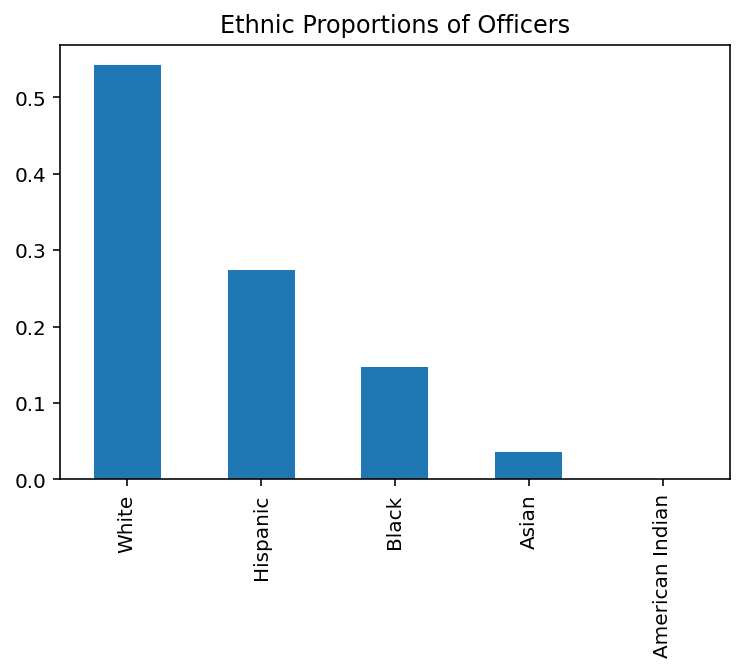

In [623]:
# take the table above and turn it into a bar graph
(complaints_small['mos_ethnicity'].value_counts(normalize = True)).plot(kind = 'bar', \
                                                                         title = 'Ethnic Proportions of Officers')

Similar to the analysis above, we are looking up at the ethnic distribution of the complainants to get  a better sense of the column.

In [624]:
complaints['complainant_ethnicity'].value_counts(normalize = True)

Black              0.620207
Hispanic           0.232804
White              0.100855
Other Race         0.024534
Asian              0.019280
American Indian    0.002319
Name: complainant_ethnicity, dtype: float64

<AxesSubplot:title={'center':'Ethnic Proportions of Complainant'}>

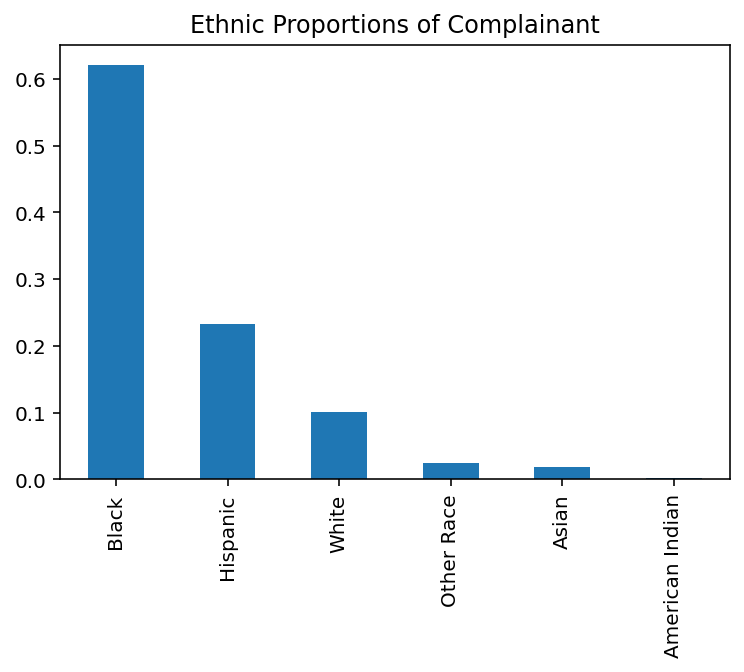

In [625]:
(complaints_small['complainant_ethnicity'].value_counts(normalize = True)).plot(kind = 'bar', \
title = 'Ethnic Proportions of Complainant')

This table looks at the various allegations towards white officers made by black complainants vs that of asian complainants

In [626]:
complaints.loc[(complaints['mos_ethnicity'] == 'White') & (complaints['complainant_ethnicity'] == 'Black')]['fado_type']\
.value_counts(normalize=True)

Abuse of Authority    0.604236
Force                 0.234002
Discourtesy           0.138016
Offensive Language    0.023746
Name: fado_type, dtype: float64

In [627]:
complaints.loc[(complaints['mos_ethnicity'] == 'White') & (complaints['complainant_ethnicity'] == 'White')]['fado_type']\
.value_counts(normalize=True)

Abuse of Authority    0.596236
Force                 0.201579
Discourtesy           0.181542
Offensive Language    0.020644
Name: fado_type, dtype: float64

This table is looking at given all the cases involving a white mos and nonwhite complainant vs the ones that were not, and the proportion of each category that went and didn't go against the complainant

In [628]:
complainant_pivot = complaints_small.pivot_table(index = 'white_mos_nonwhite_complainant', columns = 'against_complainant', aggfunc = 'size')\
.apply(lambda x:x / x.sum(), axis=1)
complainant_pivot

against_complainant,False,True
white_mos_nonwhite_complainant,,
False,0.257870,0.742130
True,0.239545,0.760455


<AxesSubplot:xlabel='against_complainant'>

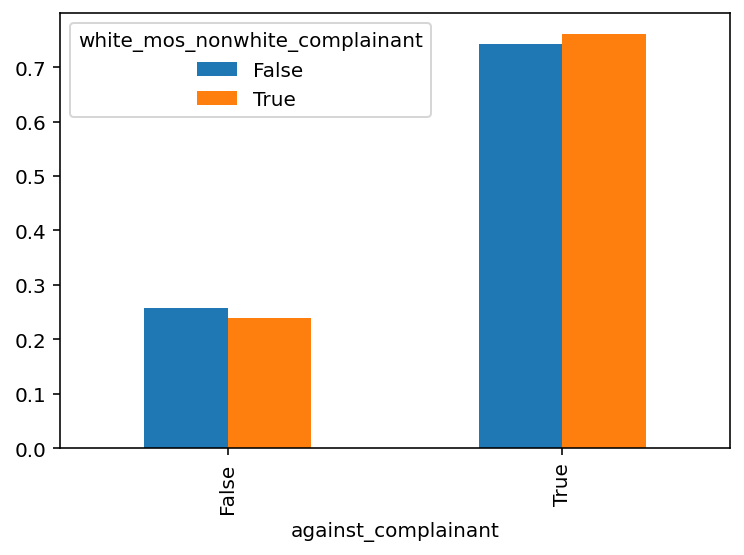

In [629]:
complainant_pivot.T.plot(kind = 'bar')

### Assessment of Missingness

Checking missing dependence on complainant_ethnicity and mos_ethnicity

In [630]:
missing_distrib_ethn = complaints.assign(is_null = complaints['complainant_ethnicity'].isnull())\
.pivot_table(index = 'is_null', columns = 'mos_ethnicity', aggfunc = 'size')\
.apply(lambda x: x / x.sum(), axis = 1)

Graphing the bars of the different MOS ethnicities based on whether complainant ethnicity is null/nonull to analyze similiarities

<AxesSubplot:title={'center':'Distribution of MOS ethnicities when complainant ethinicity is null and nonnull'}, xlabel='mos_ethnicity'>

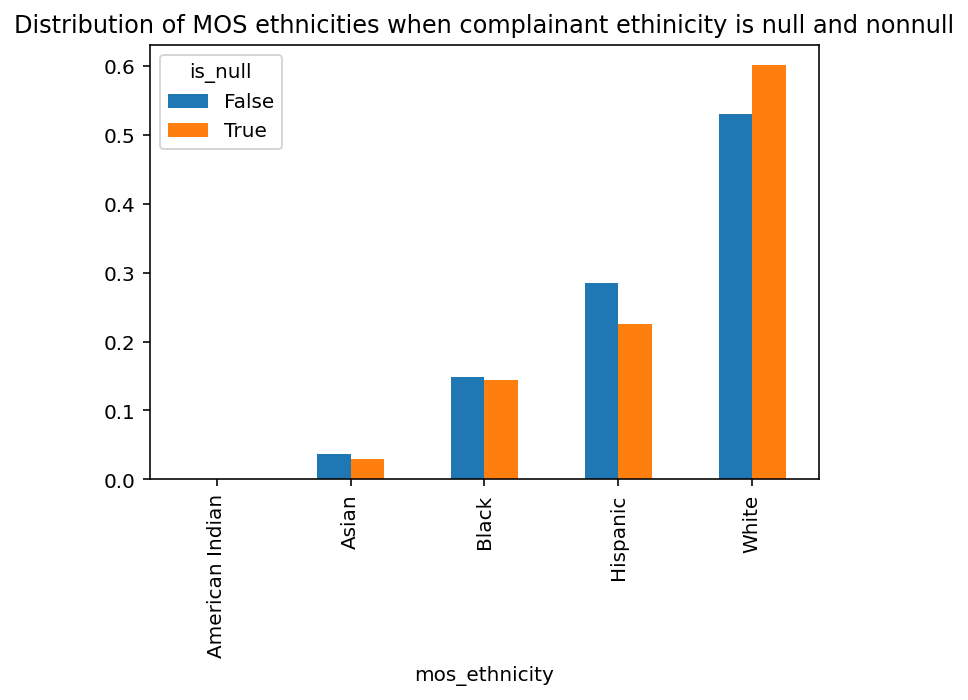

In [631]:
missing_distrib_ethn.T.plot(kind='bar', \
                            title='Distribution of MOS ethnicities when complainant ethinicity is null and nonnull')

In [632]:
obsv_tvd_ethn = missing_distrib_ethn.diff().iloc[-1].abs().sum() / 2
obsv_tvd_ethn

0.07087942963191317

In [633]:
n_repetitions = 500


tvds = []
for _ in range(n_repetitions):
    
    new_col =complaints['mos_ethnicity'].sample(replace=False, frac=1).reset_index(drop=True)
    
    shuffled = complaints.assign(**{'mos_ethnicity': new_col,'is_null': complaints['complainant_ethnicity'].isnull()})
    
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='mos_ethnicity', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    curr_tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    
    tvds.append(curr_tvd)

In [634]:
p_val = np.mean(tvds > obsv_tvd_ethn)
p_val

0.0

Plotting all of the shuffled tvds and the observed tvd

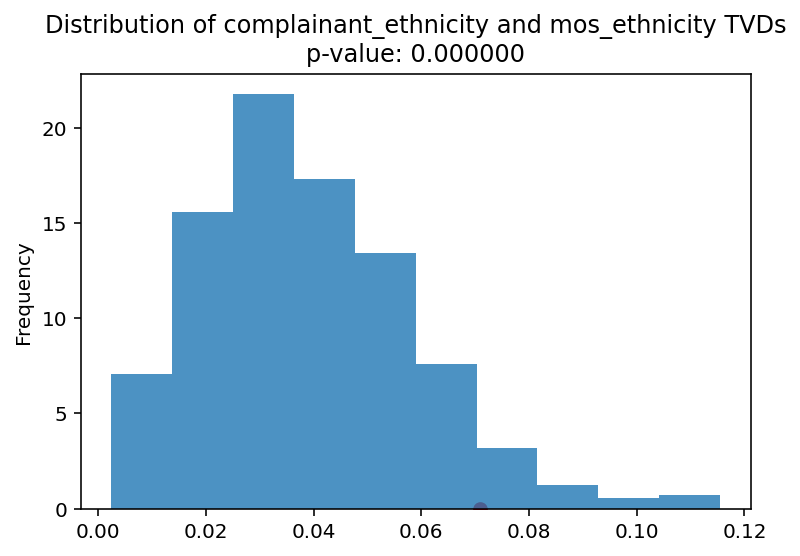

In [673]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Distribution of complainant_ethnicity and \
mos_ethnicity TVDs\np-value: %f' % p_val)
plt.scatter(obsv_tvd_ethn, 0, color='red', s=40);

Some of the graphs from the permutation tests involving complainant_ethnicity that gave back a p-valu of 0.0.

In [646]:
missing_distrib_board = complaints.assign(is_null = complaints['complainant_ethnicity'].isnull())\
.pivot_table(index = 'is_null', columns = 'board_disposition', aggfunc = 'size')\
.apply(lambda x: x / x.sum(), axis = 1)

In [649]:
obsv_tvd_board = missing_distrib_board.diff().iloc[-1].abs().sum() / 2
obsv_tvd_board

0.09737632923348705

In [650]:
tvd_board = perm('complainant_ethnicity', 'board_disposition')

In [652]:
p_val_board = np.mean(tvds > obsv_tvd_board)
p_val_board

0.008

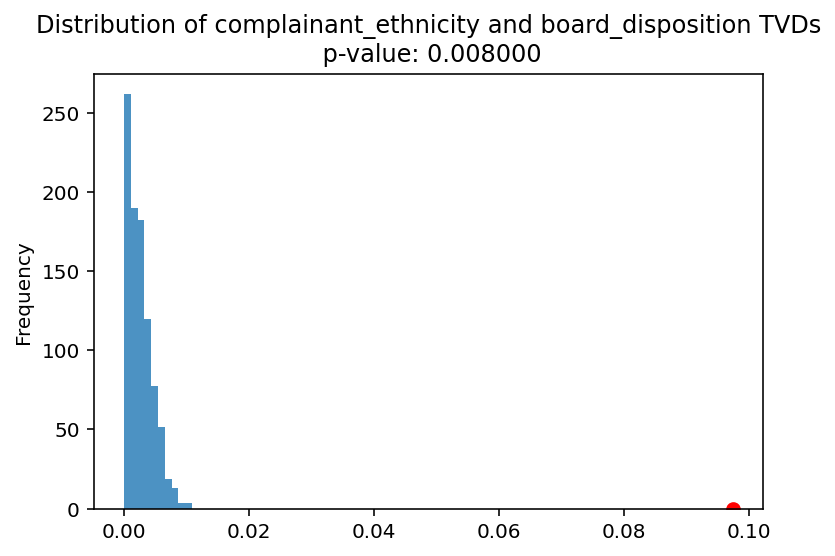

In [672]:
pd.Series(tvd_board).plot(kind='hist', density=True, alpha=0.8, title= 'Distribution of complainant_ethnicity and \
board_disposition TVDs\n p-value: %f' % p_val_board)
plt.scatter(obsv_tvd_board, 0, color='red', s=40);

In [660]:
missing_distrib_gender = complaints.assign(is_null = complaints['complainant_ethnicity'].isnull())\
.pivot_table(index = 'is_null', columns = 'mos_gender', aggfunc = 'size')\
.apply(lambda x: x / x.sum(), axis = 1)

In [661]:
obsv_tvd_gender = missing_distrib_gender.diff().iloc[-1].abs().sum() / 2
obsv_tvd_gender

0.014705069447305177

In [662]:
tvd_board = perm('complainant_ethnicity', 'mos_gender')

In [664]:
p_val_gender = np.mean(tvd_board > obsv_tvd_gender)
p_val_gender

0.0

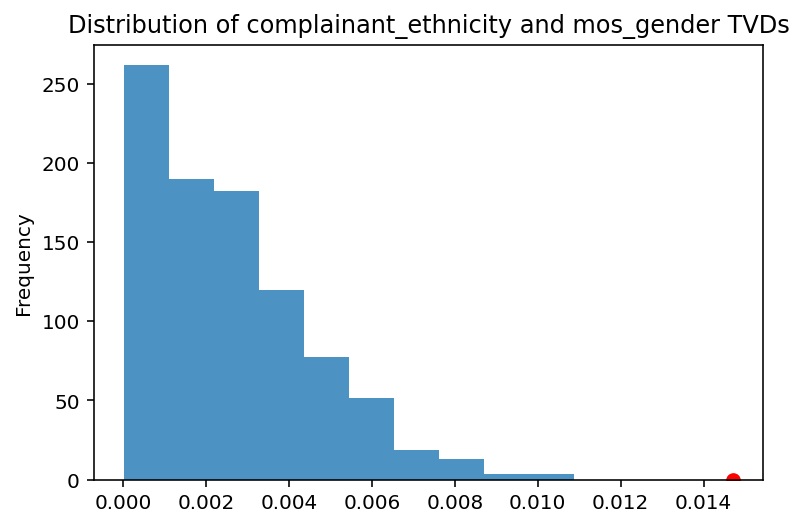

In [671]:
pd.Series(tvd_board).plot(kind='hist', density=True, alpha=0.8, title= 'Distribution of complainant_ethnicity and \
mos_gender TVDs')
plt.scatter(obsv_tvd_gender, 0, color='red', s=40);

Checking missing dependence on contact_reason and board_disposition

In [638]:
missing_distrib_reason = complaints.assign(is_null = complaints['contact_reason'].isnull())\
.pivot_table(index = 'is_null', columns = 'board_disposition', aggfunc = 'size')\
.apply(lambda x: x / x.sum(), axis = 1)
missing_distrib_reason

board_disposition,Exonerated,Substantiated,Unsubstantiated
is_null,,,
False,0.287855,0.248952,0.463192
True,0.321608,0.231156,0.447236


<AxesSubplot:title={'center':'Distribution of board_disposition when contact_reason is null and nonnull'}, xlabel='board_disposition'>

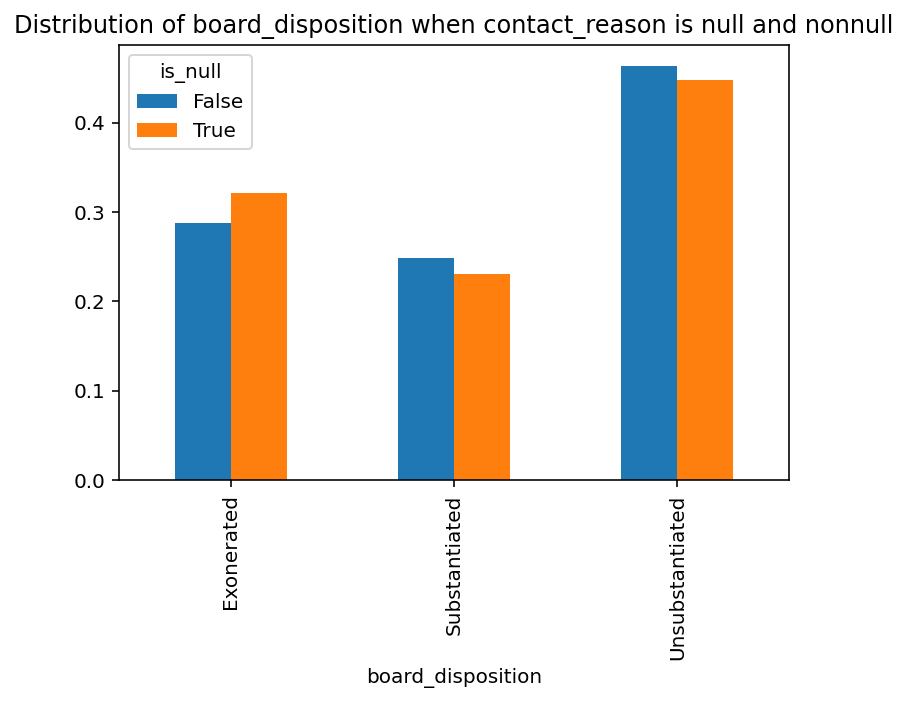

In [639]:
missing_distrib_reason.T.plot(kind='bar', \
title='Distribution of board_disposition when contact_reason is null and nonnull')

In [640]:
obsv_tvd_reason = missing_distrib_reason.diff().iloc[-1].abs().sum() / 2
obsv_tvd_reason

0.03375255601873174

In [641]:
n_repetitions = 500


tvds = []
for _ in range(n_repetitions):

    new_col =complaints['board_disposition'].sample(replace=False, frac=1).reset_index(drop=True)

    shuffled = complaints.assign(**{'board_disposition': new_col,'is_null': complaints['contact_reason'].isnull()})

    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='board_disposition', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )

    curr_tvd = shuffled.diff().iloc[-1].abs().sum() / 2

    tvds.append(curr_tvd)

In [642]:
p_val_reason = np.mean(tvds > obsv_tvd_reason)
p_val_reason

0.534

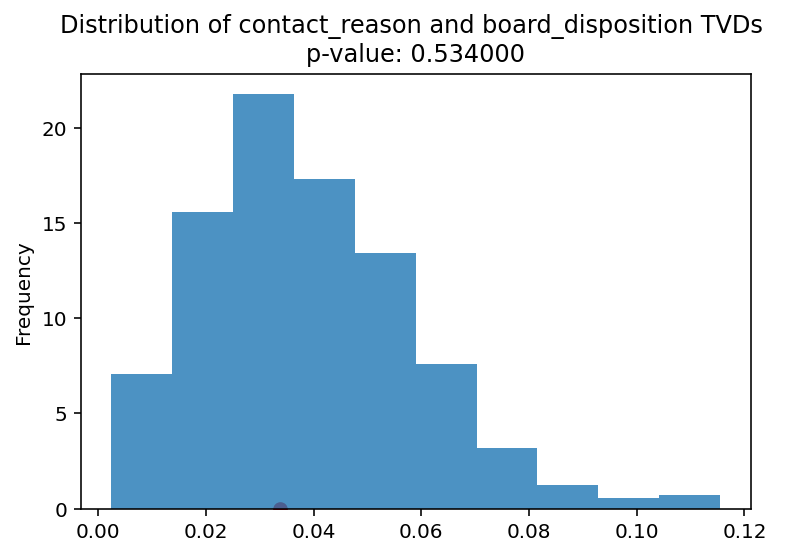

In [669]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, \
    title='Distribution of contact_reason and board_disposition TVDs \np-value: %f' % p_val_reason)
plt.scatter(obsv_tvd_reason, 0, color='red', s=40);

### Hypothesis Test

#### Null Hypothesis:
White-officer and non-white complainant cases are equally likely to go against the complainant.

#### Alternative Hypothesis:
White-officer and non-white complainant cases are more likely to go against the complainant.

#### Test Statistic:
TVD

#### Significance Level:
0.05

In [484]:
# observed table and observed tvd
cases = complaints_small.pivot_table(index = 'white_mos_nonwhite_complainant', columns = 'against_complainant', aggfunc = 'size')\
.apply(lambda x:x / x.sum(), axis=1)
cases

against_complainant,False,True
white_mos_nonwhite_complainant,,
False,0.257870,0.742130
True,0.239545,0.760455


In [556]:
obsv_tvd_cases = cases.diff().iloc[-1].abs().sum() / 2
obsv_tvd_cases

0.018325526864510847

In [574]:
n_repetitions = 1000


tvds_cases = []
for _ in range(n_repetitions):

    new_col =complaints['white_mos_nonwhite_complainant'].sample(replace=False, frac=1).reset_index(drop=True)

    shuffled = complaints.assign(**{'white_mos_nonwhite_complainant': new_col})

    shuffled = (
        shuffled
        .pivot_table(index = 'white_mos_nonwhite_complainant', columns = 'against_complainant', aggfunc = 'size')
        .apply(lambda x:x / x.sum(), axis=1)
    )

    curr_tvd = shuffled.diff().iloc[-1].abs().sum() / 2

    tvds_cases.append(curr_tvd)


In [667]:
p_val_cases = np.mean(tvds_cases > obsv_tvd_cases)
print("p-value: ", p_val_cases)

p-value:  0.0


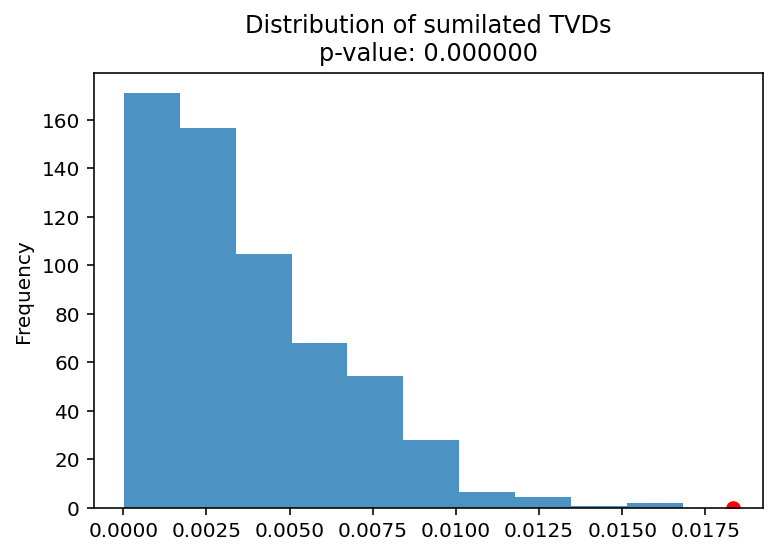

In [670]:
pd.Series(tvds_cases).plot(kind='hist', density=True, alpha=0.8, title='Distribution of sumilated TVDs\np-value: %f' % p_val_cases)
plt.scatter(obsv_tvd_cases, 0, color='red', s=40);

Given our p-value of 0.0 from our permutation test, we reject the null hypothesis.